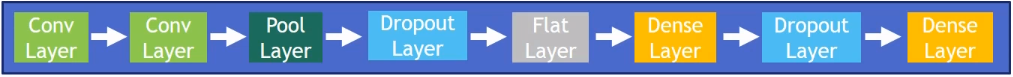

In [2]:
# Mnist 데이터 불러오기 및 정규화
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# 텐서로 변환 (높이, 너비, 채널)
x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [3]:
# CNN 모델 구축
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())  # 3차원 텐서를 1차원 벡터로 변환

cnn.add(Dense(128, activation='relu'))  # 은닉층 개념
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))   # 출력층

In [4]:
# CNN 모델 컴파일 및 학스
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 35s 8ms/step - loss: 0.5255 - accuracy: 0.8133 - val_loss: 0.3407 - val_accuracy: 0.8767
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3432 - accuracy: 0.8793 - val_loss: 0.2942 - val_accuracy: 0.8919
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2947 - accuracy: 0.8934 - val_loss: 0.2714 - val_accuracy: 0.8964
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2613 - accuracy: 0.9054 - val_loss: 0.2466 - val_accuracy: 0.9084
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2375 - accuracy: 0.9141 - val_loss: 0.2382 - val_accuracy: 0.9111
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2157 - accuracy: 0.9200 - val_loss: 0.2169 - val_accuracy: 0.9206
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2018 - accuracy: 0.9258 - val_loss: 0.2216 - val_accuracy: 0.9195
Epoch

In [5]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2780 - accuracy: 0.9341


[0.2780091166496277, 0.9340999722480774]

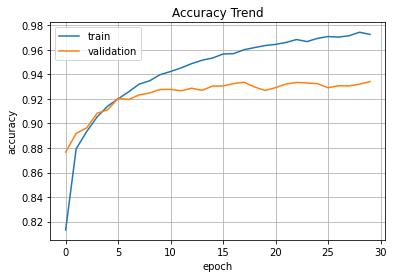

In [6]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

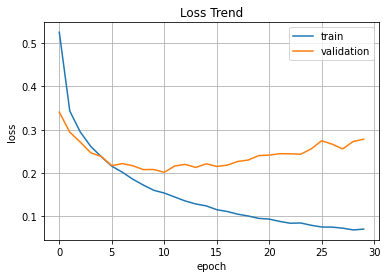

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
# !!이미지 데이터를 분류하는 경우에 있어 ANN보다 CNN을 이용하는 것이 더 높은 정확도를 보임!!